In [7]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from os import path
from collections import defaultdict

import sys
sys.path.insert(0, path.abspath(path.join(path.curdir, '../src')))

%matplotlib notebook

In [8]:
sample_rate = 100
start_time = 0
end_time = 10
time = np.arange(start_time, end_time, 1/sample_rate)
frequency = 1
amplitude = 0.5
theta = 0

sinewave = amplitude * np.sin(2 * np.pi * frequency * time + theta)

# Try 1

#noise = np.random.normal(0, 2, sinewave.shape)
#signal = sinewave + noise
#signal_df= pd.DataFrame(signal)
#signal_df.rename(columns={ signal_df.columns[0]: "A" }, inplace = True)

# Random Try 

sinewave_df = pd.DataFrame(sinewave)
sinewave_df.to_csv(r'/Users/lenastroer/Python_Lokal/MasterThese/tb8/test_signal_original.csv')


<IPython.core.display.Javascript object>


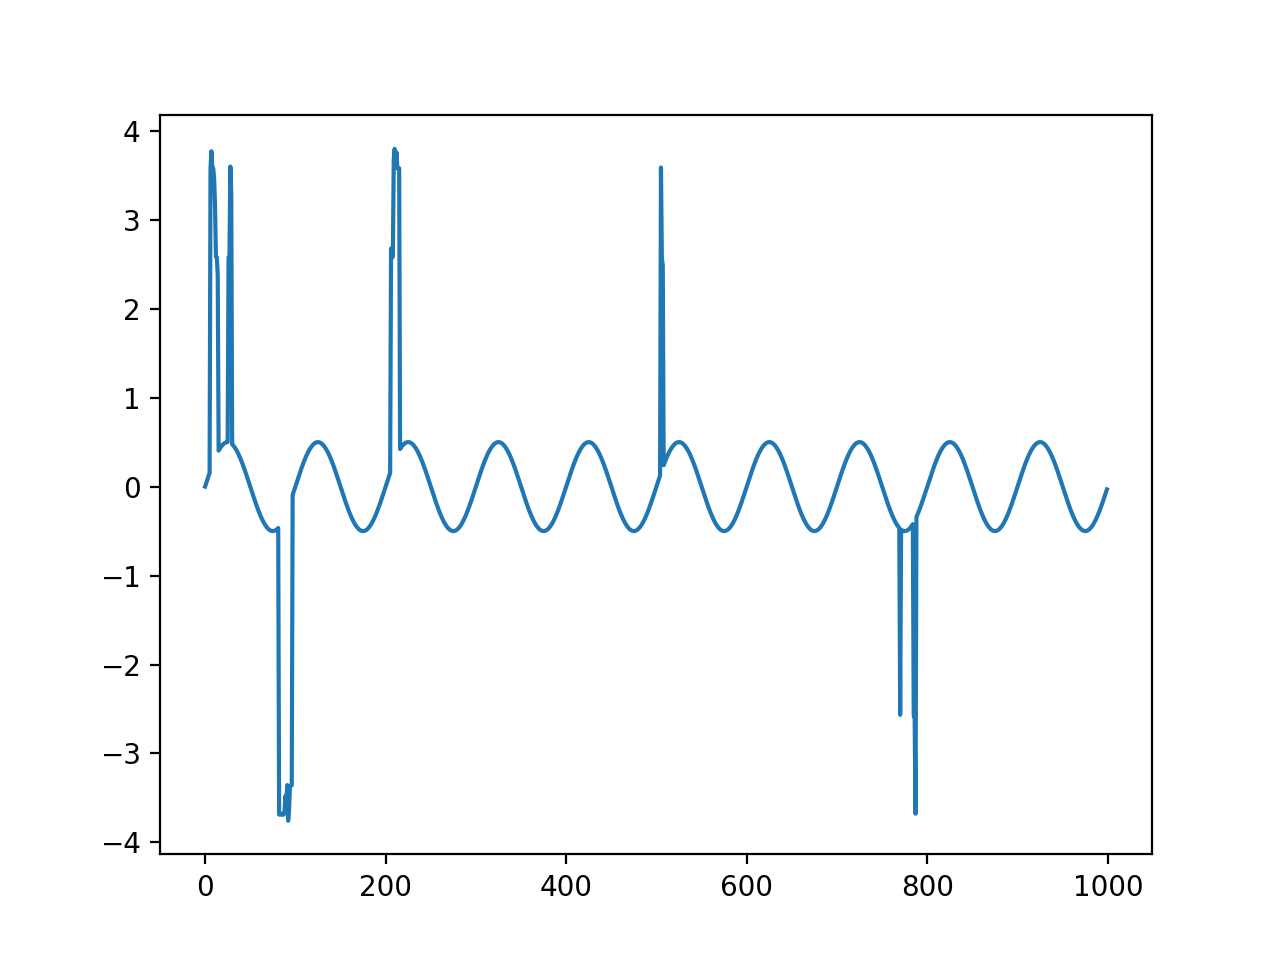

In [9]:
signal_df = pd.read_csv('test_signal_modified.csv')
signal_array = pd.DataFrame.to_numpy(signal_df)
signal_df.rename(columns={ signal_df.columns[0]: "A" }, inplace = True)
plt.figure()
plt.plot(signal_df.A)

In [11]:
threshold = 2 # acceleration threshold (m/s^2)
threshold_neg= -2

constraints = signal_df.A[(signal_df.A < threshold) & (signal_df.A > threshold_neg)]
#constraints = signal_df.A[(signal_df.A > threshold) | (signal_df.A < threshold_neg)]

# determine independent blade movement periods
period = constraints[constraints.index.to_series().diff() > 3].index.to_list()
period.insert(0, constraints.index[0])
period.insert(len(period), constraints.index[-1])
period_indices = list()


for i in range(len(period) -1 ):
    gaps = constraints[period[i]:period[i+1]].index.to_series().diff() 
    period_indices.append((period[i], period[i+1]-gaps[period[i+1]]))

In [6]:
print(period_indices)
print(gaps)

[(0, 5.0), (15, 25.0), (30, 81.0), (97, 205.0), (216, 504.0), (508, 784.0), (788, 998.0)]
833    NaN
834    1.0
835    1.0
836    1.0
837    1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Length: 167, dtype: float64


<IPython.core.display.Javascript object>


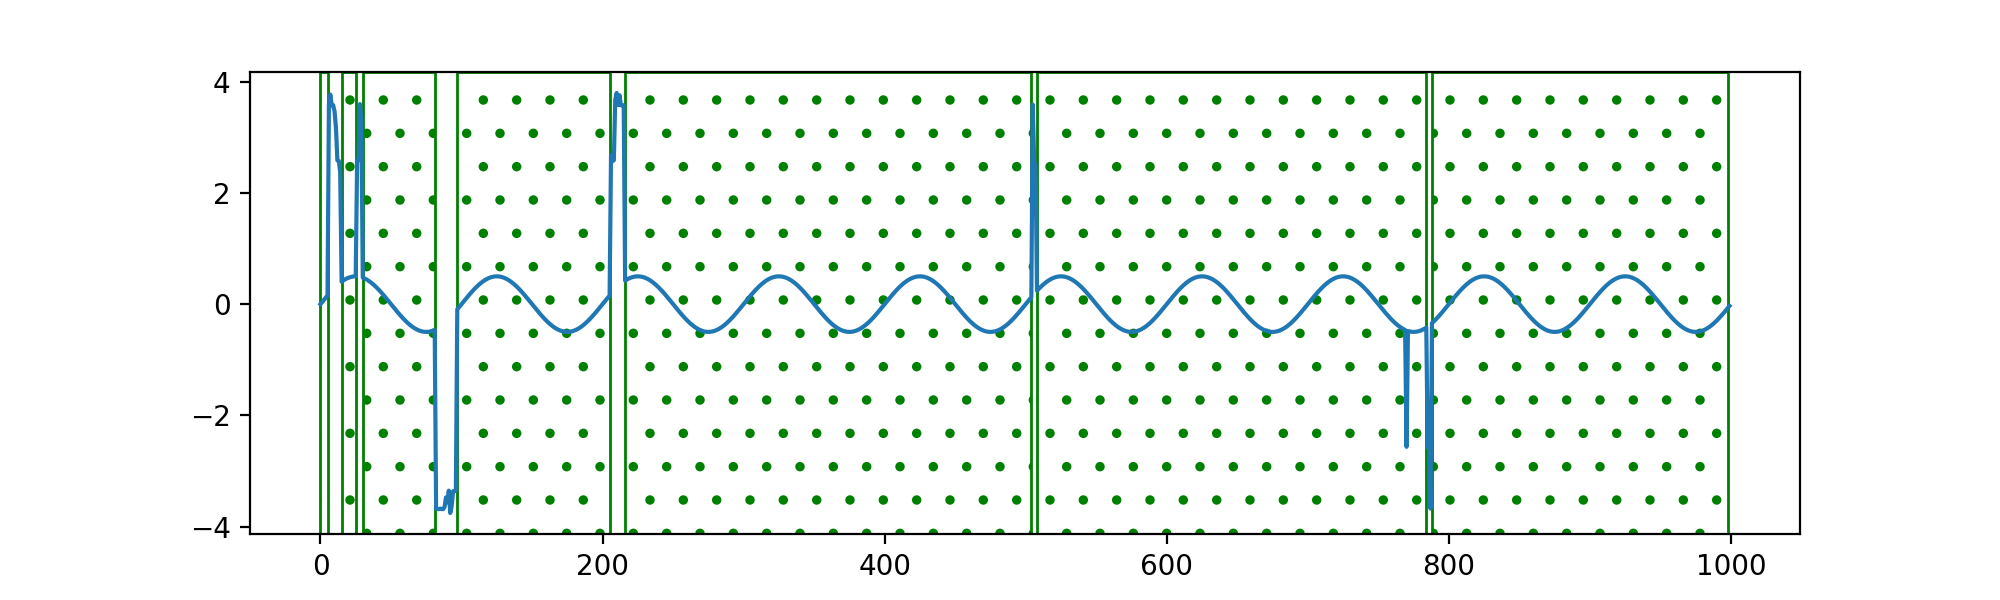

In [8]:
plt.figure(figsize= (10,3))
plt.plot(signal_df.A)

# plot independent oscillations during installation times
for i in range(len(period_indices)):
    for j in range (0,1):
        period_indices[i:j]
        plt.axvspan(xmin=period_indices[i][j], xmax=period_indices[i][j+1], hatch='.', facecolor='white', edgecolor='g') 